<a href="https://colab.research.google.com/github/sneharreddy25/project_2025/blob/main/Project_Text_Classification_using_Decision_Trees_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project : Text Classification using Decision Trees in Python

In [1]:
pip install scikit-learn

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()  # Upload your ZIP file

Saving 20 news group.zip to 20 news group.zip


In [7]:
import zipfile
import os

# Replace 'your_folder.zip' with the name of your uploaded file
with zipfile.ZipFile('20 news group.zip', 'r') as zip_ref:
    zip_ref.extractall('20 news group')  # You can choose any folder name


In [10]:
# Load the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups_train.data, newsgroups_train.target, test_size=0.2, random_state=42)

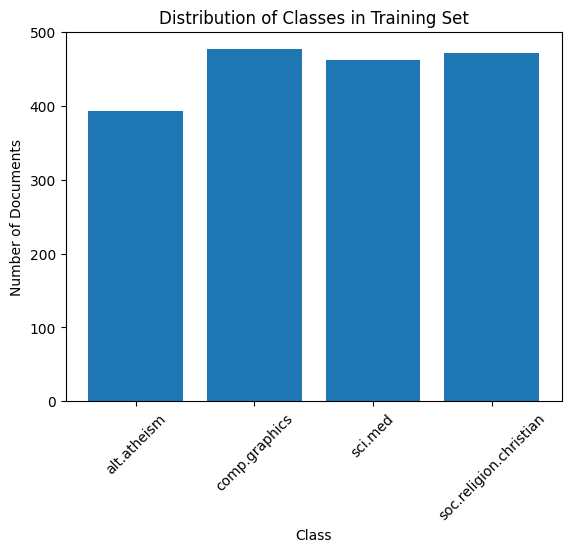

In [12]:
# Display distribution of classes in the training set
class_distribution = np.bincount(y_train)
plt.bar(range(len(class_distribution)), class_distribution)
plt.xticks(range(len(class_distribution)), newsgroups_train.target_names, rotation=45)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Documents')
plt.show()

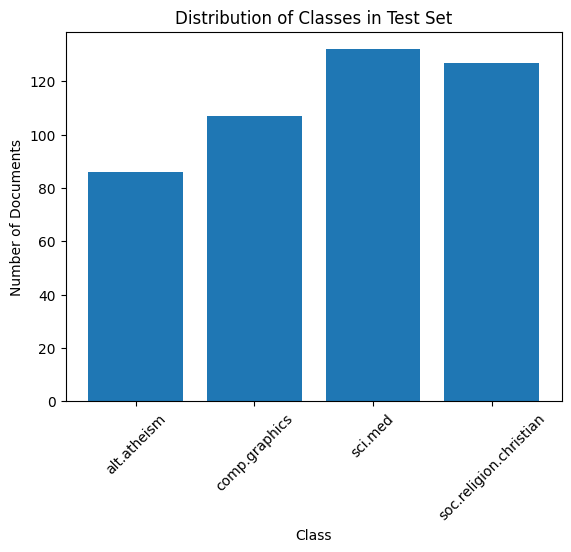

In [13]:
# Display distribution of classes in the test set
class_distribution = np.bincount(y_test)
plt.bar(range(len(class_distribution)), class_distribution)
plt.xticks(range(len(class_distribution)), newsgroups_test.target_names, rotation=45)
plt.title('Distribution of Classes in Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Documents')
plt.show()

In [14]:
# Data preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [15]:
# Initialize and train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

Accuracy: 0.6324900133155792

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.53      0.39      0.45       319
         comp.graphics       0.61      0.82      0.70       389
               sci.med       0.66      0.58      0.62       396
soc.religion.christian       0.70      0.69      0.70       398

              accuracy                           0.63      1502
             macro avg       0.62      0.62      0.62      1502
          weighted avg       0.63      0.63      0.62      1502



Text Classification using Random Forest



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))


Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.70      0.48      0.57       319
         comp.graphics       0.77      0.93      0.84       389
               sci.med       0.80      0.75      0.77       396
soc.religion.christian       0.74      0.82      0.78       398

              accuracy                           0.76      1502
             macro avg       0.75      0.74      0.74      1502
          weighted avg       0.75      0.76      0.75      1502



In [18]:
from sklearn.svm import SVC

# Initialize and train an SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))


Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.75      0.63      0.68       319
         comp.graphics       0.91      0.90      0.90       389
               sci.med       0.80      0.90      0.85       396
soc.religion.christian       0.80      0.82      0.81       398

              accuracy                           0.82      1502
             macro avg       0.82      0.81      0.81      1502
          weighted avg       0.82      0.82      0.82      1502

